# ds-assignment

In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np
import os
from pathlib import Path

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/rong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read Data

In [2]:
DATA_DIR = 'reviews'
review_dir = [str(path) for path in Path(DATA_DIR).glob('**/*')]

review_dir.sort(key=lambda i: i[-5])

In [3]:
columns = ['id','filePath','hotel_name','review','rating','groundTruth']
reviewsDF = pd.read_csv(review_dir[-1], names=columns)

In [4]:
reviewsDF.head()

,id,filePath,hotel_name,review,rating,groundTruth
0,168600636,data2/ca/1102799/4191651/169097965.html,Lakeview Hecla Resort,"If you love to golf, this resort will not disa...",4,positive
1,169097965,data2/ca/1102799/4191651/169347960.html,Lakeview Hecla Resort,Stayed here for one night on the Stay and Play...,4,positive
2,169347960,data2/ca/1102799/4191651/170010173.html,Lakeview Hecla Resort,we called the day we checked in to have mainte...,2,negative
3,170010173,data2/ca/1102799/4191651/170153756.html,Lakeview Hecla Resort,This was our first visit to Lakeview Resort. B...,4,positive
4,194637934,data2/ca/1102799/4191651/194738124.html,Lakeview Hecla Resort,Great place if you like outdoor winter activit...,5,positive


In [5]:
reviewsDF.dropna(inplace=True)
reviewsDF.drop(['id','filePath'], 1, inplace=True)

In [6]:
reviewsDF.groundTruth = reviewsDF.groundTruth.map(lambda x: 0 if x=='negative' else 1)

In [7]:
reviewsDF.head()

,hotel_name,review,rating,groundTruth
0,Lakeview Hecla Resort,"If you love to golf, this resort will not disa...",4,1
1,Lakeview Hecla Resort,Stayed here for one night on the Stay and Play...,4,1
2,Lakeview Hecla Resort,we called the day we checked in to have mainte...,2,0
3,Lakeview Hecla Resort,This was our first visit to Lakeview Resort. B...,4,1
4,Lakeview Hecla Resort,Great place if you like outdoor winter activit...,5,1


## Q1 (a)

In [8]:
def vader_score(sent):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(sent)['compound']

In [9]:
reviewsDF['vader'] = reviewsDF['review'].apply(vader_score)

In [10]:
reviewsDF.head()

,hotel_name,review,rating,groundTruth,vader
0,Lakeview Hecla Resort,"If you love to golf, this resort will not disa...",4,1,0.9866
1,Lakeview Hecla Resort,Stayed here for one night on the Stay and Play...,4,1,0.9665
2,Lakeview Hecla Resort,we called the day we checked in to have mainte...,2,0,-0.2296
3,Lakeview Hecla Resort,This was our first visit to Lakeview Resort. B...,4,1,0.9779
4,Lakeview Hecla Resort,Great place if you like outdoor winter activit...,5,1,0.9643


In [11]:
review_avgDF = reviewsDF.groupby('hotel_name')['rating','vader'].mean().reset_index()

In [12]:
review_avgDF.head()

,hotel_name,rating,vader
0,Airport Motor Inn,1.000000,-0.638038
1,Andersen Inn and Suites,4.050000,0.798015
2,Best Western Plus Brandon Inn,4.240000,0.750548
3,Best Western Plus Pembina Inn & Suites,4.719298,0.934356
4,Best Western Plus Winnipeg Airport Hotel,4.368421,0.811029


## Q1 (b)

In [13]:
rank_ratingDF = review_avgDF.sort_values(by='rating', ascending=False) 

In [14]:
rank_ratingDF.head() # top 5 hotels based on rating

,hotel_name,rating,vader
17,Canalta Selkirk,5.000000,0.971500
48,Inverness Falls Resort,5.000000,0.976900
54,Lazy Bear Lodge,5.000000,0.968867
60,Norwood Hotel,4.888889,0.826167
25,Courtyard Winnipeg Airport,4.772727,0.931173


In [15]:
rank_ratingDF.tail() # bottom 5 hotels based on rating

,hotel_name,rating,vader
31,Econo Lodge,2.333333,0.550400
85,Viscount Gort Hotel Banquet and Conference Centre,2.333333,0.461633
61,Park West Inn,2.000000,0.589133
90,Winnipeg Thriftlodge,1.727273,-0.003309
0,Airport Motor Inn,1.000000,-0.638038


In [16]:
rank_vaderDF = review_avgDF.sort_values(by='vader', ascending=False)

In [17]:
rank_vaderDF.head() # top 5 hotels based on vader

,hotel_name,rating,vader
75,Super 8 Winnipeg West,4.5,0.978050
48,Inverness Falls Resort,5.0,0.976900
17,Canalta Selkirk,5.0,0.971500
84,Victoria Inn Hotel & Convention Centre,4.0,0.971329
54,Lazy Bear Lodge,5.0,0.968867


In [18]:
rank_vaderDF.tail() # bottom 5 hotels based on vader

,hotel_name,rating,vader
49,Jolly Lodger Motel,2.666667,0.208000
33,Express By Canad Inns - Fort Garry,4.000000,0.111750
40,Hi-way Motel,2.800000,0.039980
90,Winnipeg Thriftlodge,1.727273,-0.003309
0,Airport Motor Inn,1.000000,-0.638038


Most of the rankings match on ratings and vader scores even though the order are a little different. There are some discrepencies on the bottom 5 hotels with these two ranking methods. 

## Q2  (a)

In [19]:
sw = stopwords.words('english')

In [20]:
def text_clean(text):
    
    text = text.lower()
    text = re.sub(r'\S+@\S+','',text)
    text = re.sub(r'\swww\S+','',text)
    text = re.sub(r'<.+?>+',' ',text)
    text = re.sub(r'[<][a].+','',text)
    text = re.sub(r'[^a-zA-Z ]','',text)
    text = re.sub(r'\b\w\b',' ',text)
    text = re.sub(r'hotel|room|rooms|stay|staff','',text)
    text = (' ').join([w for w in text.split() if w not in sw])
    
    return text

In [21]:
reviewsDF_copy = reviewsDF.copy()
reviewsDF_copy['review'] = reviewsDF_copy.review.apply(text_clean)

In [22]:
def freq_words(word_list,k=50):
    
    counter = Counter()
    counter.update(word_list)
    return counter.most_common(k)

In [23]:
pos_reviews = reviewsDF_copy[reviewsDF_copy['groundTruth']==1].review.tolist()
neg_reviews = reviewsDF_copy[reviewsDF_copy['groundTruth']==0].review.tolist()

In [24]:
pos_list = []
neg_list = []
for r in pos_reviews:
    pos_list = pos_list+r.split()
for r in neg_reviews:
    neg_list = neg_list+r.split()

In [25]:
pos_freq50 = freq_words(pos_list)
neg_freq50 = freq_words(neg_list)

In [26]:
pos_freq50[:10]

[('great', 965),
 ('clean', 768),
 ('nice', 699),
 ('good', 691),
 ('breakfast', 663),
 ('would', 573),
 ('ed', 543),
 ('winnipeg', 513),
 ('friendly', 511),
 ('comfortable', 484)]

In [27]:
neg_freq50[:10]

[('would', 269),
 ('desk', 226),
 ('night', 214),
 ('good', 201),
 ('front', 199),
 ('clean', 186),
 ('one', 185),
 ('nice', 179),
 ('us', 176),
 ('ed', 172)]

For the good reviews, some positive words definitely show up more often, like 'great', 'clean', 'nice', 'friendly' and 'comfortable'. Interestingly, some neutual or even poisitive words also show up in negative reviews. 

## Q2 (b)

In [28]:
tagger = PerceptronTagger()

In [29]:
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
pos_tag = tagger.tag
#taggedToks = pos_tag(re.findall(r'\w+', text))
#taggedToks

In [30]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [31]:
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
#tree= chunker.parse(taggedToks)

In [32]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [33]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [34]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDF, k=50):
    reviews = hotelDF['review'].values
    stop = set(sw)
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    
#     for word in same_phrase:
#         stop.append(word)
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(word for word in flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]) if word.lower() not in stop and len(word) > 2)
            
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    #finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDF[['hotel_name','rating','groundTruth']].join(freqReviewDf)
    return topk, finaldf

In [35]:
pos_phrase_top50, pos_phrase_data_top50 = newDataFrameTransformation(reviewsDF_copy[reviewsDF_copy['groundTruth']==1])
neg_phrase_top50, neg_phrase_data_top50 = newDataFrameTransformation(reviewsDF_copy[reviewsDF_copy['groundTruth']==0])

In [36]:
pos_phrase_top50[0:10]

[('front desk', 24),
 ('fort garri', 22),
 ('great locat', 20),
 ('great place', 14),
 ('next time', 12),
 ('free wifi', 10),
 ('coffe maker', 9),
 ('mani time', 9),
 ('comfort bed', 8),
 ('queen bed', 7)]

In [37]:
neg_phrase_top50[0:10]

[('front desk', 35),
 ('pool area', 10),
 ('next day', 7),
 ('hot tub', 6),
 ('front desk clerk', 6),
 ('sever time', 4),
 ('desk clerk', 4),
 ('queen bed', 4),
 ('next time', 4),
 ('ive ed', 3)]

By looking at the comparisons on phrases, it seems more informative than just words. 

## Q3 (a)

In [38]:
def dataFrameTransformation(reviewsDF, k=500):
    reviews = reviewsDF['review'].values
    
    stop = set(sw)
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDF = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDF.columns = dfName
    finalDF = reviewsDF.join(freqReviewDF)
#     finaldf = hotelDf[['hotel_name','rating','groundTruth']].join(finalreviewDf)
    return topk, finalDF

In [39]:
topk, finaldf = dataFrameTransformation(reviewsDF_copy)

In [40]:
finaldf.head()

,hotel_name,review,rating,groundTruth,vader,great,clean,good,nice,would,...,luggage,touch,limited,resort,finally,brought,future,rest,offer,otherwise
0,Lakeview Hecla Resort,love golf resort disappoint great picturesque ...,4,1,0.9866,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Lakeview Hecla Resort,ed one night play package price reasonable gol...,4,1,0.9665,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lakeview Hecla Resort,called day checked maintenance look ac working...,2,0,-0.2296,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Lakeview Hecla Resort,first visit lakeview resort beautiful resort s...,4,1,0.9779,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Lakeview Hecla Resort,great place like outdoor winter activities lik...,5,1,0.9643,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [42]:
miScoreDF = getMI(topk, finaldf)

In [43]:
miScoreDF.head(10)

,Word,MI Score
87,experience,0.052663
475,provide,0.051633
304,three,0.051431
33,parking,0.051040
207,motel,0.050999
288,gym,0.050903
341,grand,0.050901
381,might,0.050901
26,like,0.050900
355,selection,0.050876


There are definitely some words that are good indicators of positive or negative reviews, such as 'experience', 'provide', 'parking', 'gym'. 

## Q3 (b)

In [44]:
topk_phrase_mi, topk_phrase_mi_data = newDataFrameTransformation(reviewsDF_copy)

In [45]:
phrase_miScoreDF = getMI(topk_phrase_mi, topk_phrase_mi_data)

In [46]:
phrase_miScoreDF.head(10)

,Word,MI Score
9,mani time,0.050807
13,great experi,0.050572
2,great locat,0.050240
20,custom servic,0.050220
21,good locat,0.050220
12,sever time,0.050119
45,distanc fork,0.050103
43,reason price,0.050103
42,next morn,0.050103
34,second floor,0.050103


The phrases tell a little more than the words in indicating the sentimet of a review. Like 'great experience', 'great location'. 

## Q4 (a)

In [47]:
def pmiCal(df, x):
    pmilist=[]
    for i in [1,0]:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py + 0.0001))
            else:
                pmi = math.log(pxy/(px*py + 0.0001))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [48]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py + 0.0001))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [49]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column, topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],1,label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],0,label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [50]:
top50, top50_data = dataFrameTransformation(reviewsDF_copy, k=50)

In [51]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(top50_data,label_column='groundTruth',topk=top50)

100%|██████████| 50/50 [00:00<00:00, 107.24it/s]


In [52]:
pmiposlist.sort_values('pmi',ascending=0).head(10)

,word,pmi
33,parking,0.090239
26,like,0.077783
39,always,0.068915
34,excellent,0.053946
47,little,0.044878
23,location,0.038998
3,nice,0.038946
35,bath,0.038869
20,also,0.035556
22,get,0.032491


In [53]:
pmineglist.sort_values('pmi',ascending=0).head(10)

,word,pmi
29,could,0.172663
31,back,0.126685
44,close,0.115577
16,time,0.091022
6,one,0.065852
5,breakfast,0.064106
27,beds,0.058977
15,desk,0.058366
17,front,0.057512
28,helpful,0.042395


Top ranked results suggest that parking is very important. Also people who write excellent or like in reviews gives alot of information about the target. For negative we see that words like could and close give alot of information about a negative review imnplying maybe employees could have or the facilities were closed at time they were needed.

## Q4 (b)

In [54]:
phrase_top50, phrase_top50_data = newDataFrameTransformation(reviewsDF_copy, k=50)

In [55]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(phrase_top50_data,label_column='groundTruth',topk=phrase_top50)


100%|██████████| 50/50 [00:00<00:00, 95.21it/s] 


In [56]:
pmiposlist_phrase.sort_values('pmi',ascending=0).values

array([['hampton inn', 0.2532790654550711],
       ['reason price', 0.2532790654550711],
       ['good locat', 0.2532790654550711],
       ['custom servic', 0.2532790654550711],
       ['next morn', 0.2532790654550711],
       ['second floor', 0.2532790654550711],
       ['distanc fork', 0.2532790654550711],
       ['good place', 0.2532790654550709],
       ['top floor', 0.2532790654550709],
       ['great experi', 0.2532790654550709],
       ['air condition', 0.2532790654550709],
       ['mani time', 0.2532790654550709],
       ['last year', 0.2532790654550709],
       ['first time', 0.11974767283054837],
       ['hot tub', 0.11974767283054837],
       ['continent breakfast', 0.11974767283054837],
       ['great place', 0.08622498079190483],
       ['winnipeg airport', 0.07095750866111654],
       ['ed fort garri', 0.07095750866111654],
       ['next trip', 0.07095750866111654],
       ['next door', 0.07095750866111654],
       ['queen bed', 0.05260836999291995],
       ['fort garri',

In [57]:
pmineglist_phrase.sort_values('pmi',ascending=0).values

array([['minut walk', 0.8040842237083388],
       ['long time', 0.8040842237083388],
       ['food restaur', 0.8040842237083388],
       ['sever time', 0.6863011880519552],
       ['park lot', 0.6499335438810805],
       ['small pool', 0.5809406723941287],
       ['famili member', 0.5809406723941287],
       ['desk clerk', 0.5809406723941287],
       ['nice place', 0.5809406723941287],
       ['great locat', 0.5527697954274325],
       ['good thing', 0.3986191156001743],
       ['coffe maker', 0.3986191156001743],
       ['front desk clerk', 0.3986191156001743],
       ['close airport', 0.3986191156001743],
       ['next day', 0.2932585999423479],
       ['comfort bed', 0.2932585999423479],
       ['front desk', 0.20446310115921684],
       ['good valu', 0.11093704314839342],
       ['ive ed', 0.11093704314839342],
       ['previou review', 0.11093704314839342],
       ['next time', 0.11093704314839342],
       ['pool area', 0.11093704314839342],
       ['free wifi', -0.006845992507990

Offered more detailed information that single words, important factors for good reviews included friendly staff, great expereinced, nice touch and important factor for negative reviews included the room rate. 

They are opposite of each other which makes sense...however the negative don't have too many negative feelings...stopwords could have remove these and as mentioned before great time could have been did not have great time.

## Q5 (a)

(a)

In [58]:
reviewsDF_copy.head()

,hotel_name,review,rating,groundTruth,vader
0,Lakeview Hecla Resort,love golf resort disappoint great picturesque ...,4,1,0.9866
1,Lakeview Hecla Resort,ed one night play package price reasonable gol...,4,1,0.9665
2,Lakeview Hecla Resort,called day checked maintenance look ac working...,2,0,-0.2296
3,Lakeview Hecla Resort,first visit lakeview resort beautiful resort s...,4,1,0.9779
4,Lakeview Hecla Resort,great place like outdoor winter activities lik...,5,1,0.9643


Text(0.5, 1.0, 'Histogram of Vader Sentiment Score')

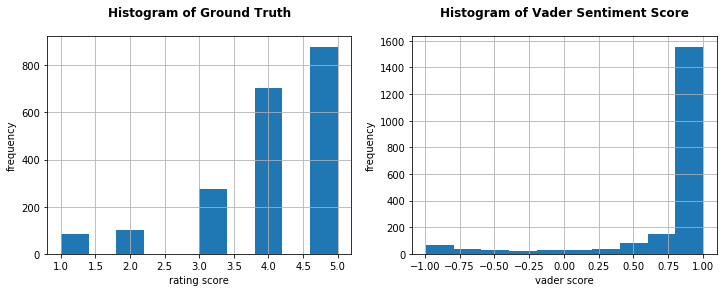

In [59]:
fig,ax = plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
reviewsDF_copy.rating.hist()
plt.xlabel('rating score')
plt.ylabel('frequency')
plt.title('Histogram of Ground Truth', fontweight='bold', pad=20)

plt.subplot(1,2,2)
reviewsDF_copy.vader.hist()
plt.xlabel('vader score')
plt.ylabel('frequency')
plt.title('Histogram of Vader Sentiment Score', fontweight='bold', pad=20)

Both the ground truth and vader distributions look similar in that they are skewed towards the positive meaning that conducting analysis on the words used in the reviews is a good indicator on if it is a positive or negative review.

(b)

Text(0.5, 1.0, 'Histogram of Reviews per Hotel')

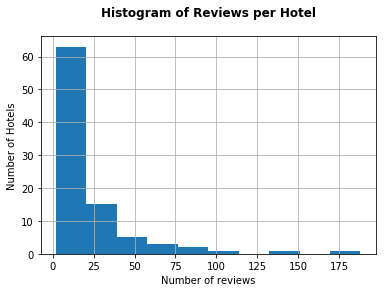

In [163]:
reviewsDF_copy.groupby('hotel_name').count()['review'].hist()
plt.xlabel('Number of reviews')
plt.ylabel('Number of Hotels')
plt.title('Histogram of Reviews per Hotel', fontweight='bold', pad=20)

Most hotels have only been reviewed about 1-25 times. Some smaller hotels might not have as many guests as bigger chains. i.e motels etc.

## Q5 (b)

In [83]:
hotels_top5review = reviewsDF_copy.groupby('hotel_name').count()['review'].sort_values(ascending=False)[:5].index.tolist()
hotelReview_top5DF = reviewsDF[reviewsDF['hotel_name'].isin(hotels_top5review)]

In [89]:
hotelReview_top5DF.head()

,hotel_name,review,rating,groundTruth,vader
416,Fort Garry Hotel,I stayed at the Fort Garry on May 23rd and 24t...,4,1,0.9962
417,Fort Garry Hotel,My partner and I stayed at the hotel for a wed...,3,0,0.9025
418,Fort Garry Hotel,My wife and I just stayed at the classic Fort ...,5,1,0.9698
419,Fort Garry Hotel,We spent a weekend at the Fort Garry to celebr...,5,1,0.9335
420,Fort Garry Hotel,Fort Garry Hotel in Winnipeg had everything we...,4,1,0.4421


Text(0, 0.5, 'Rating')

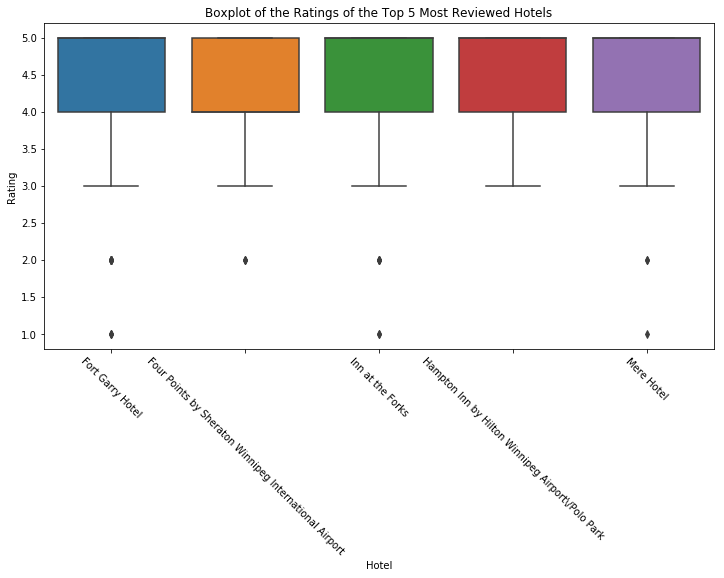

In [164]:
plt.subplots(figsize=(12,6))
sns.boxplot(x='hotel_name', y='rating', data=hotelReview_top5DF)
plt.xticks(rotation=-45)
plt.title('Boxplot of the Ratings of the Top 5 Most Reviewed Hotels', fontweight='bold', pad=20)
plt.xlabel('Hotel')
plt.ylabel('Rating')

Text(0, 0.5, 'Vader Score')

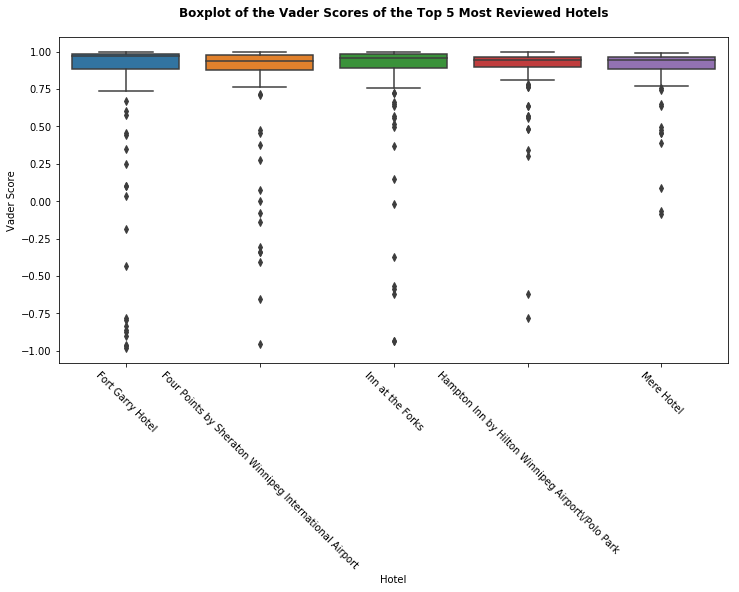

In [165]:
plt.subplots(figsize=(12,6))
sns.boxplot(x='hotel_name', y='vader', data=hotelReview_top5DF)
plt.xticks(rotation=-45)
plt.title('Boxplot of the Vader Scores of the Top 5 Most Reviewed Hotels', fontweight='bold', pad=20)
plt.xlabel('Hotel')
plt.ylabel('Vader Score')

In [99]:
hotelReview_top5DF.groupby('hotel_name').mean()[['rating','vader']]

,rating,vader
hotel_name,,
Fort Garry Hotel,4.255319,0.813382
Four Points by Sheraton Winnipeg International Airport,4.091954,0.767161
Hampton Inn by Hilton Winnipeg Airport\/Polo Park,4.680412,0.860827
Inn at the Forks,4.360902,0.831691
Mere Hotel,4.455556,0.864884


In [100]:
hotelReview_top5DF.groupby('hotel_name').std()[['rating','vader']]

,rating,vader
hotel_name,,
Fort Garry Hotel,0.969439,0.430254
Four Points by Sheraton Winnipeg International Airport,0.756863,0.424765
Hampton Inn by Hilton Winnipeg Airport\/Polo Park,0.511256,0.267234
Inn at the Forks,0.907363,0.363267
Mere Hotel,0.766740,0.209373


The box plots are more informative as it gives a better represenation of how the data is distributed. The mean and variance are a nice addition to compare close means/whiskers numerically. 

## Q5 (c)

(a)

Text(0, 0.5, 'Vader Score')

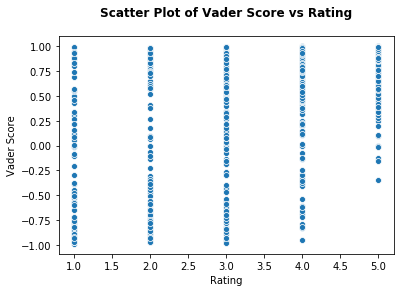

In [166]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='rating', y='vader', data=reviewsDF_copy)
plt.title('Scatter Plot of Vader Score vs Rating', fontweight='bold', pad=20)
plt.xlabel('Rating')
plt.ylabel('Vader Score')

In [119]:
x = reviewsDF_copy['rating'].values
y = reviewsDF_copy['vader'].values

In [120]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0.5, 0, 'Rating')

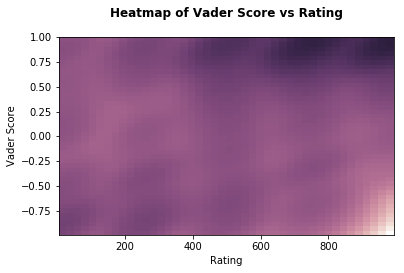

In [167]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
plt.title('Heatmap of Vader Score vs Rating', fontweight='bold', pad=20)
ax1.set_ylabel('Vader Score')
ax1.set_xlabel('Rating')

This tells us that sentiment score and rating are highly correlated at ratings 4-5 with vader scores .8 to 1.

(b)

In [122]:
reviewsDF['review_len'] = reviewsDF['review'].apply(lambda x: len(x.split()))

In [126]:
yr = reviewsDF['rating'].values
x = reviewsDF['review_len'].values

kr = gaussian_kde(np.vstack([x, yr]))
xi, yir = np.mgrid[x.min():x.max():x.size**0.5*1j,yr.min():yr.max():yr.size**0.5*1j]
zir = kr(np.vstack([xi.flatten(), yir.flatten()]))

Text(0, 0.5, 'Rating')

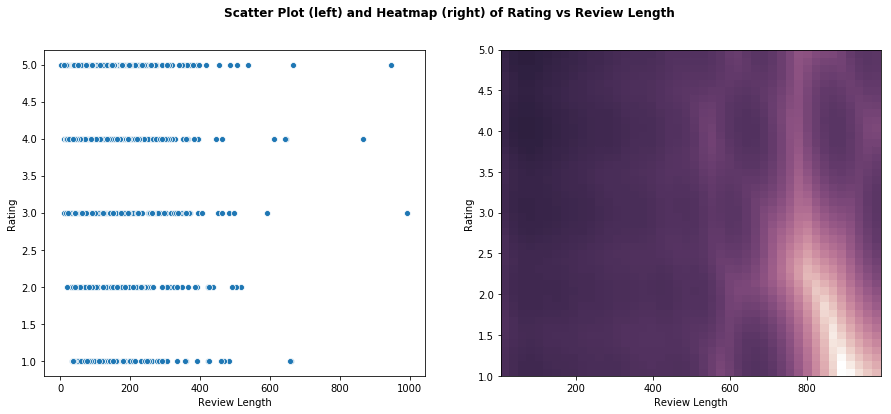

In [151]:
fig,ax = plt.subplots(figsize=(15,6))
plt.suptitle('Scatter Plot (left) and Heatmap (right) of Rating vs Review Length', fontweight='bold')
plt.subplot(121)
sns.scatterplot(x,yr)
plt.xlabel('Review Length')
plt.ylabel('Rating')

plt.subplot(122)
plt.pcolormesh(xi, yir, np.log10(zir.reshape(xi.shape)), cmap=cmap)
plt.xlim(x.min(), x.max())
plt.ylim(yr.min(), yr.max())
plt.xlabel('Review Length')
plt.ylabel('Rating')

In [138]:
yv = reviewsDF['vader'].values
x = reviewsDF['review_len'].values

kv = gaussian_kde(np.vstack([x, yv]))
xi, yiv = np.mgrid[x.min():x.max():x.size**0.5*1j,yv.min():yv.max():yv.size**0.5*1j]
ziv = kv(np.vstack([xi.flatten(), yiv.flatten()]))

Text(0, 0.5, 'Vader Score')

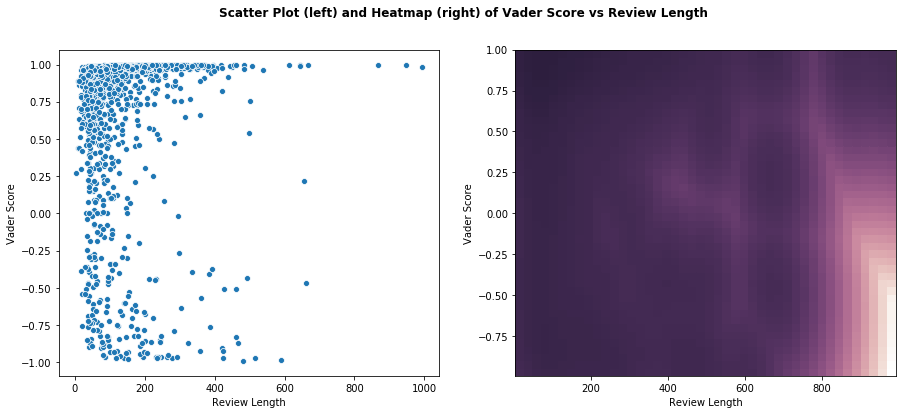

In [152]:
fig,ax = plt.subplots(figsize=(15,6))
plt.suptitle('Scatter Plot (left) and Heatmap (right) of Vader Score vs Review Length', fontweight='bold')
plt.subplot(121)
sns.scatterplot(x,yv)
plt.xlabel('Review Length')
plt.ylabel('Vader Score')

plt.subplot(122)
plt.pcolormesh(xi, yiv, np.log10(ziv.reshape(xi.shape)), cmap=cmap)
plt.xlim(x.min(), x.max())
plt.ylim(yv.min(), yv.max())
plt.xlabel('Review Length')
plt.ylabel('Vader Score')

The scatter and heatmaps indicate that review length is typically longer for both very positive and very negative review with neutral reviews having the lower word length on average. Postive reviews tended to have slightly longer word counts that negative.

(c)

In [160]:
review_count = reviewsDF_copy.groupby('hotel_name').count()['review'].tolist()

In [161]:
avg_rating = reviewsDF_copy.groupby('hotel_name').mean()['rating'].tolist()
avg_vader = reviewsDF_copy.groupby('hotel_name').mean()['vader'].tolist()

Text(0, 0.5, 'Vader Score')

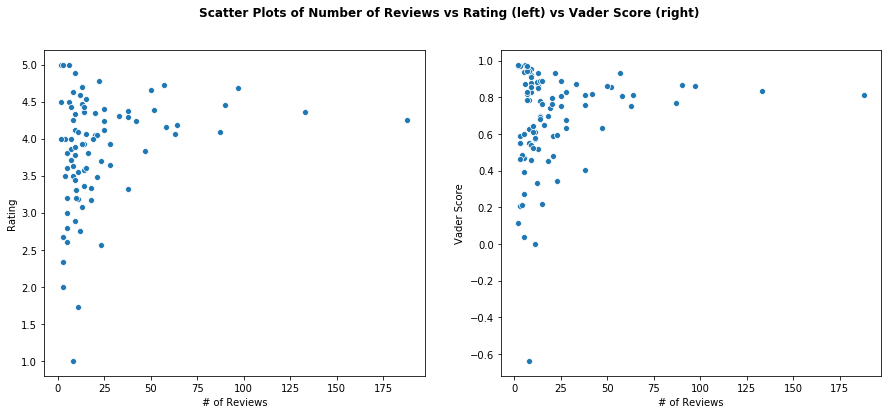

In [162]:
fig,ax = plt.subplots(figsize=(15,6))
plt.suptitle('Scatter Plots of Number of Reviews vs Rating (left) vs Vader Score (right)', fontweight='bold')
plt.subplot(121)
sns.scatterplot(review_count,avg_rating)
plt.xlabel('# of Reviews')
plt.ylabel('Rating')

plt.subplot(122)
sns.scatterplot(review_count,avg_vader)
plt.xlabel('# of Reviews')
plt.ylabel('Vader Score')

Hotels with more reviews tend to have higher ratings and sentiment scores.